# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api}&units=metric'

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | floresville
Processing Record 5 of Set 1 | gadzhiyevo
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | reedley
Processing Record 11 of Set 1 | oromocto
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | eden isle
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | holualoa
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | ebebiyin
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | natal
Processing Record 22 of Set 1 | wa

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,13.90,83,92,9.83,NZ,1708296496
1,yellowknife,62.4560,-114.3525,-15.33,77,75,2.57,CA,1708296498
2,floresville,29.1336,-98.1561,14.42,35,7,0.44,US,1708296500
3,gadzhiyevo,69.2551,33.3362,-7.10,89,73,9.62,RU,1708296501
4,adamstown,-25.0660,-130.1015,24.56,75,91,4.14,PN,1708296502


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
date = city_data_df['Date'].min()


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,13.90,83,92,9.83,NZ,2024-02-18
1,yellowknife,62.4560,-114.3525,-15.33,77,75,2.57,CA,2024-02-18
2,floresville,29.1336,-98.1561,14.42,35,7,0.44,US,2024-02-18
3,gadzhiyevo,69.2551,33.3362,-7.10,89,73,9.62,RU,2024-02-18
4,adamstown,-25.0660,-130.1015,24.56,75,91,4.14,PN,2024-02-18


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

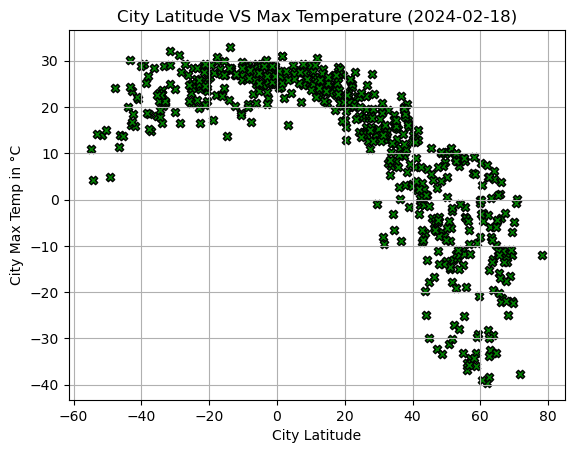

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='X', facecolors='g', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Max Temp in °C")
plt.title(f"City Latitude VS Max Temperature ({date})")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

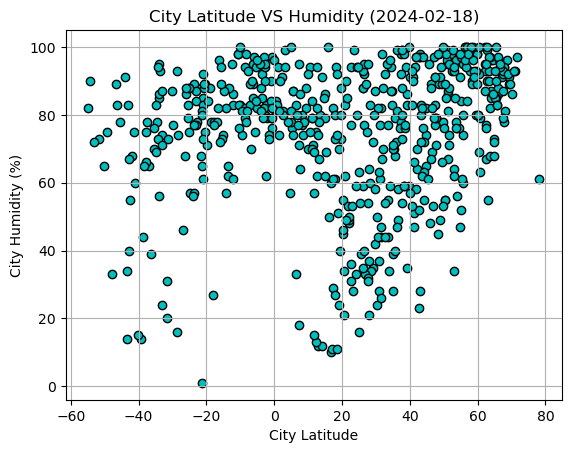

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolors='c', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Humidity (%)")
plt.title(f"City Latitude VS Humidity ({date})")

# Save the figure
plt.savefig("output_data/latvhum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

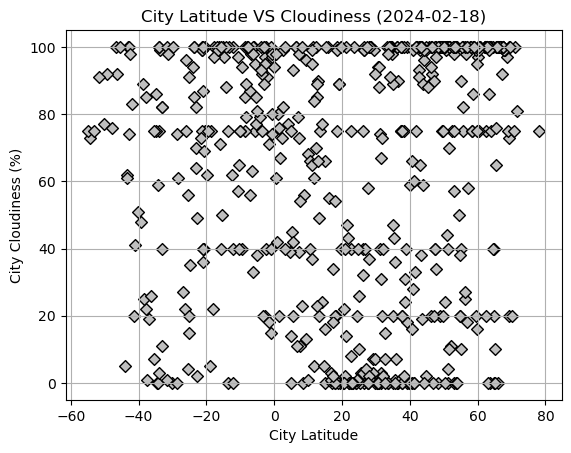

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='D', facecolors='0.75', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness (%)")
plt.title(f"City Latitude VS Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/latvcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

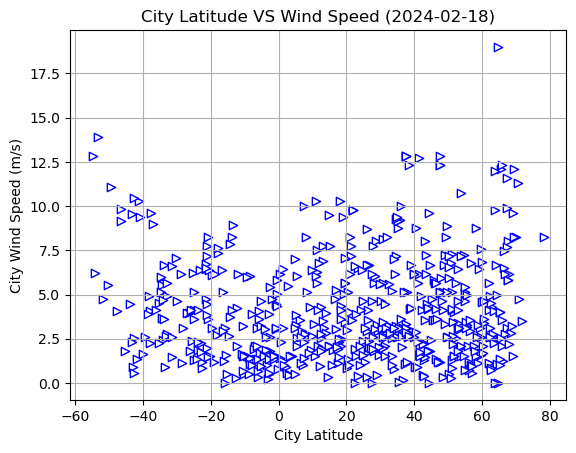

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='>', facecolors='w', edgecolors='b')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed (m/s)")
plt.title(f"City Latitude VS Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/latvws.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [44]:
# Define a function to create Linear Regression plots
def lr_func(x,y):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-15.33,77,75,2.57,CA,2024-02-18
2,floresville,29.1336,-98.1561,14.42,35,7,0.44,US,2024-02-18
3,gadzhiyevo,69.2551,33.3362,-7.10,89,73,9.62,RU,2024-02-18
6,hasaki,35.7333,140.8333,15.16,68,36,9.19,JP,2024-02-18
7,jamestown,42.0970,-79.2353,-1.23,70,100,4.92,US,2024-02-18


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,13.90,83,92,9.83,NZ,2024-02-18
4,adamstown,-25.0660,-130.1015,24.56,75,91,4.14,PN,2024-02-18
5,carnarvon,-24.8667,113.6333,28.36,57,35,1.27,AU,2024-02-18
10,papatowai,-46.5619,169.4708,11.41,89,100,9.15,NZ,2024-02-18
13,port-aux-francais,-49.3500,70.2167,4.79,75,92,11.06,TF,2024-02-18


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.75x + 34.54
The r-value is: -0.8238328178414096


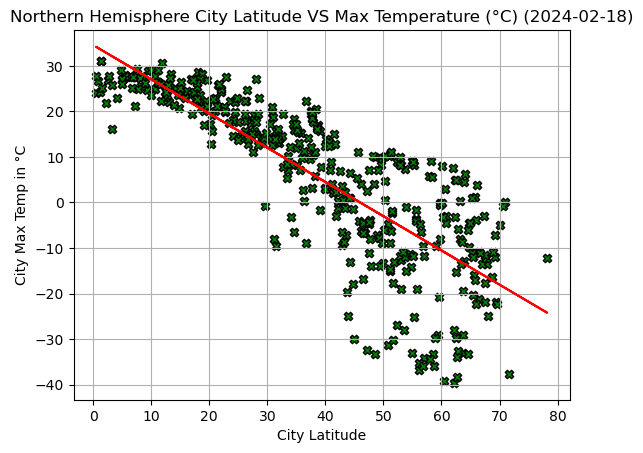

<Figure size 640x480 with 0 Axes>

In [48]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='X', facecolors='g', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Max Temp in °C")
plt.title(f"Northern Hemisphere City Latitude VS Max Temperature (°C) ({date})")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
lr_func(x,y)
plt.show()
plt.savefig("output_data/nhlatvtemp.png")



Linear equation: y = 0.19x + 27.96
The r-value is: 0.54876873554673


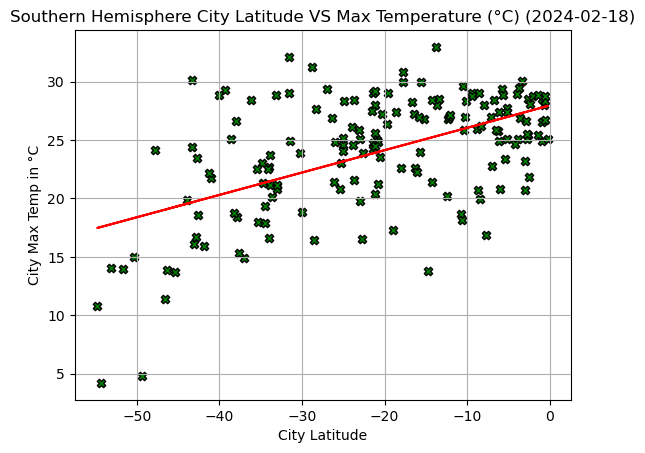

<Figure size 640x480 with 0 Axes>

In [49]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='X', facecolors='g', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Max Temp in °C")
plt.title(f"Southern Hemisphere City Latitude VS Max Temperature (°C) ({date})")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
lr_func(x,y)
plt.show()
plt.savefig("output_data/shlatvtemp.png")

**Discussion about the linear relationship:** There's no real suprise here that there is a correlation between latitude and maximum temperature. The closer a city is to the equator the more likely it is to have a higher maximum temperature. For the Northern Hemisphere, this creates a negative correlation as the latitudes on the left side of the graph are the closest to the equator and move away as the plot progresses. It has the opposite effect on the Southern Hemisphere plot as it is the inverse with the latitudes starting furthest away from the equator and moving closer. It is interesting that the r value is so much less in the Southen Hemisphere ;however there are of course other factors at play in climate such as weather patterns, altitude, whether the city is along the coast making it more temperate, etc, which could be skewing the data. I think particularly coastal areas could be as there are many more island chains in the southern hemisphere and overall less large landmasses meaning more of the cities would be closer to the ocean.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.37x + 60.15
The r-value is: 0.3311093844102793


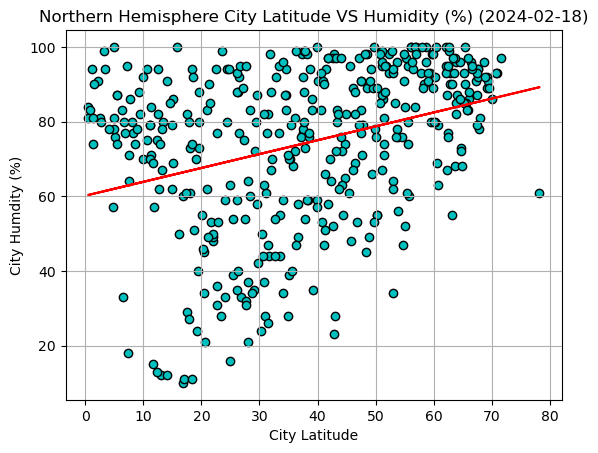

<Figure size 640x480 with 0 Axes>

In [51]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='c', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Humdity (%)")
plt.title(f"Northern Hemisphere City Latitude VS Humidity (%) ({date})")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
lr_func(x,y)
plt.show()
plt.savefig("output_data/nhlatvhum.png")

Linear equation: y = 0.52x + 86.92
The r-value is: 0.4018167883913414


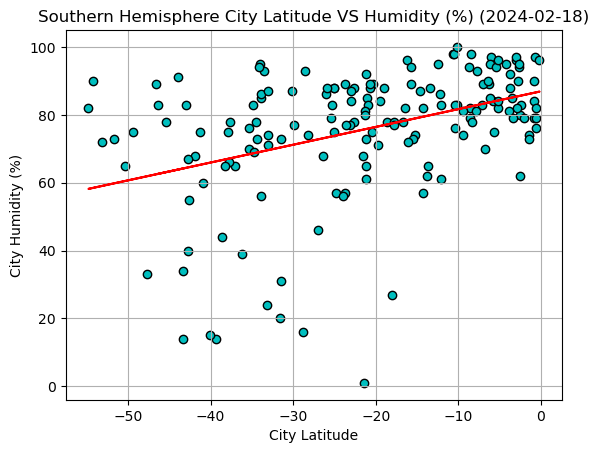

<Figure size 640x480 with 0 Axes>

In [52]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='c', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Humidity (%)")
plt.title(f"Southern Hemisphere City Latitude VS Humidity (%) ({date})")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
lr_func(x,y)
plt.show()
plt.savefig("output_data/shlatvhum.png")

**Discussion about the linear relationship:** There appears to be little to no correlation between latitude and humidity The intersting thing is that both correlations are positive rather than inverse as one might expect to see given the relationship shown between latitude and temperature. This leads me to believe there is something else at play affecting this. Without doing more research, it's truly impossible to say, but I'd hazard a guess that it has to do with so many arid and desertous regions being in the part of the Northern Hemisphere closer to the equator whereas in the Southern Hemisphere more of the desertous regions are futher south with many rainforests and tropical areas being closer to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.59x + 35.86
The r-value is: 0.2805984804755197


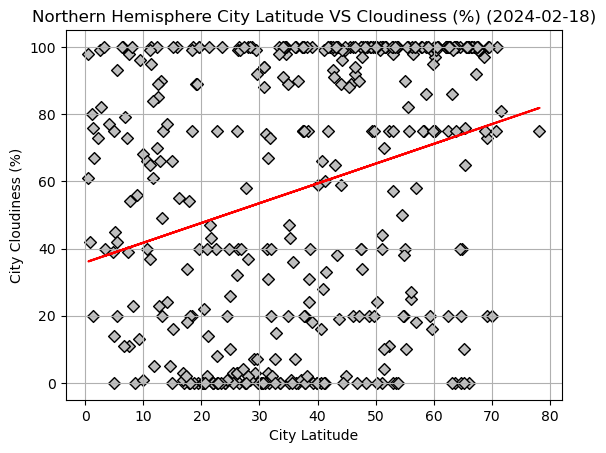

<Figure size 640x480 with 0 Axes>

In [53]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='D', facecolors='0.75', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness (%)")
plt.title(f"Northern Hemisphere City Latitude VS Cloudiness (%) ({date})")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
lr_func(x,y)
plt.show()
plt.savefig("output_data/nhlatvcloud.png")

Linear equation: y = 0.36x + 75.55
The r-value is: 0.16114054061688637


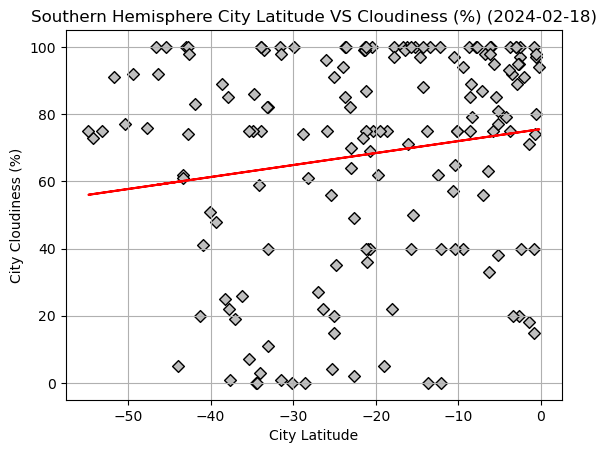

<Figure size 640x480 with 0 Axes>

In [54]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='D', facecolors='0.75', edgecolors='k')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness (%)")
plt.title(f"Southern Hemisphere City Latitude VS Cloudiness (%) ({date})")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
lr_func(x,y)
plt.show()
plt.savefig("output_data/shlatvcloud.png")

**Discussion about the linear relationship:** There's no relationship really between latitude and cloudiness. Even less than what we see with latitude and humidity. This is the expected result in my opinion given how many temperate and tropical rainforests there are scattered north and south. These scatter plots certainly live up to their name.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 3.53
The r-value is: 0.10593534773311247


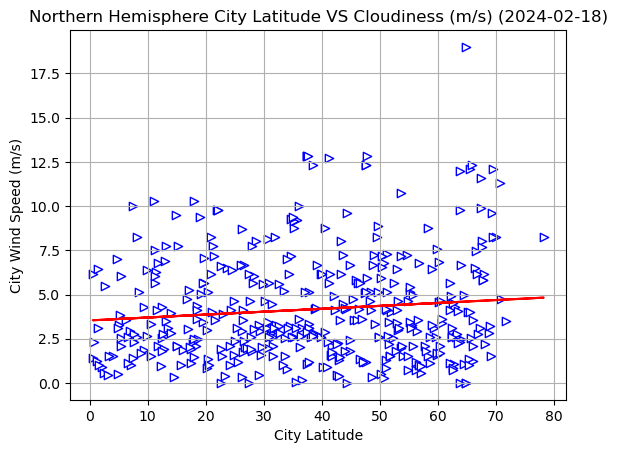

<Figure size 640x480 with 0 Axes>

In [55]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='>', facecolors='w', edgecolors='b')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed (m/s)")
plt.title(f"Northern Hemisphere City Latitude VS Cloudiness (m/s) ({date})")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
lr_func(x,y)
plt.show()
plt.savefig("output_data/nhlatvws.png")

Linear equation: y = -0.08x + 2.06
The r-value is: -0.4442090998114472


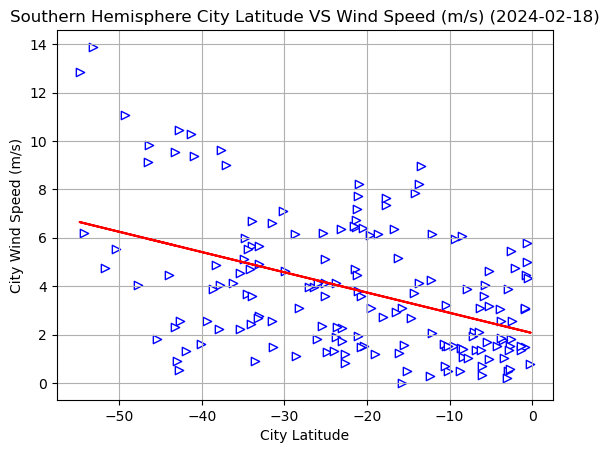

<Figure size 640x480 with 0 Axes>

In [56]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='>', facecolors='w', edgecolors='b')
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed (m/s)")
plt.title(f"Southern Hemisphere City Latitude VS Wind Speed (m/s) ({date})")
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
lr_func(x,y)
plt.show()
plt.savefig("output_data/shlatvws.png")

**Discussion about the linear relationship:** Again there seems to be little to no correlation between wind speed and latitude just like the previous two y-variables. The southern hemisphere does appear to have a small negative correlation where cities closer to the equator have slower wind speeds, but I think this is more than likely due to whether or not those cities are inland or coastal as most of the larger inland areas in the southern hemisphere are closer to the equator and the island/coastal areas, which would have higher wind speeds are typically further south. Again that is just a hypothesis, more research would need to be done to find out.